# The effect of locomotion on stimulus representations in v1
### Introduction 

* Start with broad question, show other stuff (corr matrix, pca, stimulus tuning, SNR comparison between stat and run)

### Decoding Section

*   Performance of Linear decoder, Running compared to Stationary  (Do the predict, plot line. Xaxis Y Yaxis Ypred). K Fold Cross val on Ridge Regression?
*   Performance of Random Forests, Running compared to Stationary (Do the prediction... y vs ypred). Error rate vs n trees
*  Performance of decoders on Tuned/ Non-Tuned neurons. TODO
*  Decoding Running speed   TODO

### Other stuff we tried

* PCA, Network stuff, Something from Miro Board?

###Conclusion

In [1]:

import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True
!pip install ipython-autotime
%load_ext autotime

import seaborn as sns

sns.set_context('talk')


Bad key "text.kerning_factor" on line 4 in
/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/

In [3]:
#@title Data loading
import numpy as np
dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])
time: 1.4 s


In [4]:
#@title Define masks for different conditions, running versus stationary

run_mask = dat['run'] > 50
stat_mask = dat['run'] == 0

time: 637 µs


In [5]:
#@title Use masks to define trials when running/not & take mean response

run_conds = dat['sresp'][:,run_mask]
stat_conds = dat['sresp'][:,stat_mask]

run_resp = np.mean(run_conds,1)

time: 650 ms


In [6]:
#@title Function to calculate the orientation selectivity index of each neuron

def calculate_osi(stim, data):

  """
  stim (1, 4598 // 1, stim): array of stimulus values 
  data (23589, 4598 // neurons, responses): array of responses by neuron
  """

  #stim = (stim*180)/(2*np.pi)

  osi = []

  for neuron in data: 

    neuron_osi = np.sqrt(np.sum(neuron*np.cos(2*stim))**2 + (np.sum(neuron*np.sin(2*stim)))**2)/neuron.sum()

    osi.append(neuron_osi)

  return osi

  

time: 1.11 ms


In [7]:
#Calculate OSI for all trials
osi = calculate_osi(dat['istim'], dat['sresp'])

#OSI for all run trials
osi_run = calculate_osi(dat['istim'][run_mask], run_conds)

#OSI for all stat trials
osi_stat = calculate_osi(dat['istim'][stat_mask], stat_conds)

#Random sampling to correct for the fact there are only 337 "fast running" trials

#Subset of stationary trials
possible_stat_trials = dat['sresp'][:,stat_mask]
possible_stim = dat['istim'][stat_mask]
stat_rand_choice = np.random.choice((np.arange(0, possible_stat_trials.shape[1])), size = 337, replace = False)
osi_rand_stat = calculate_osi(possible_stim[stat_rand_choice], possible_stat_trials[:,stat_rand_choice])

#Subset of all trials
possible_trials = dat['sresp']
possible_stim = dat['istim']
rand_choice = np.random.choice((np.arange(0, possible_trials.shape[1])), size = 337, replace = False)
osi_rand = calculate_osi(possible_stim[rand_choice], possible_trials[:,rand_choice])

time: 9.43 s


[Text(0, 0, 'Strong Tuned'), Text(0, 0, 'Weak Tuned')]

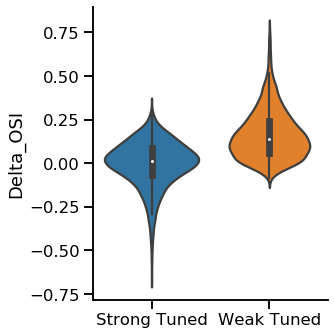

time: 159 ms


In [8]:

v_tuned = np.argwhere(np.array(osi_stat)>0.6)

v_tuned_diff = np.array(osi_run)[v_tuned] - np.array(osi_stat)[v_tuned]

not_tuned = np.argwhere(np.array(osi_stat)<0.1)

not_tuned_diff = np.array(osi_run)[not_tuned] - np.array(osi_stat)[not_tuned]

data = [v_tuned_diff, not_tuned_diff]


f, axes = plt.subplots(1, 1, figsize=(5, 5))

sns.violinplot(data = data, orient = 'v')
plt.ylabel('Delta_OSI')
axes.set_xticklabels(['Strong Tuned','Weak Tuned'])

In [9]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/Myers/opt/miniconda3/lib/python3.7/site-packages (0.23.1)
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/Myers/opt/miniconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info



In [ ]:
#@title Q2 code  RUNNING SPEED

import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor

import pickle


n = 100
y = dat['run']
X = dat['sresp']

test_data_size = 200
N = X.shape[1]

sizetocut = len(X)   #"How many neurons do we keep?"
np.random.seed(2020)
mask_test = np.random.choice(np.arange(N),test_data_size)
mask_train = np.delete(np.arange(N),mask_test)
X_test = X[:sizetocut,mask_test]
X_train = X[:sizetocut,mask_train]
y_test = y[mask_test]
y_train = y[mask_train]
X_train = X_train.T
X_test = X_test.T

for model_type in ['linear','forest']:
  if model_type == 'forest':   #Declare RF, train it, predict test from it
    print('doing forest')
    model = RandomForestRegressor(n_estimators=n, random_state=0)
    model.fit(X_train, y_train)
    
    model.score(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train =  model.predict(X_train)
    filename = 'Trained {} model run speeds.sav'.format(model_type)
    pickle.dump(model, open(filename, 'wb'))
  



  elif model_type == 'linear':
    print('doing linear')
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    linear_model.score(X_train, y_train)
    y_pred_test = linear_model.predict(X_test)
    y_pred_train =  linear_model.predict(X_train)
    filename = 'Trained {} model run speeds.sav'.format(model_type)
    pickle.dump(linear_model, open(filename, 'wb'))



doing linear
doing forest


In [11]:
#@title Run this and don't ask questions


def calculate_osi(stim, data):

  """
  stim (1, 4598 // 1, stim): array of stimulus values 
  data (23589, 4598 // neurons, responses): array of responses by neuron
  """

  #stim = (stim*180)/(2*np.pi)

  osi = []

  for neuron in data: 

    neuron_osi = np.sqrt(np.sum(neuron*np.cos(2*stim))**2 + (np.sum(neuron*np.sin(2*stim)))**2)/neuron.sum()

    osi.append(neuron_osi)

  return osi

#Calculate OSI for all trials
osi = calculate_osi(dat['istim'], dat['sresp'])
not_tuned = np.argwhere(np.array(osi)<np.percentile(osi,25))

time: 4.16 s


In [12]:
#@title Q4 code Running TUNED-NOT TUNED

import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor

import pickle


n = 100
y = dat['run']
X = dat['sresp'][not_tuned][:,0,:]

test_data_size = 200
N = X.shape[1]

sizetocut = len(X)   #"How many neurons do we keep?"
np.random.seed(2020)
mask_test = np.random.choice(np.arange(N),test_data_size)
mask_train = np.delete(np.arange(N),mask_test)
X_test = X[:sizetocut,mask_test]
X_train = X[:sizetocut,mask_train]
y_test = y[mask_test]
y_train = y[mask_train]
X_train = X_train.T
X_test = X_test.T

for model_type in ['linear','forest']:
  if model_type == 'forest':   #Declare RF, train it, predict test from it
    model = RandomForestRegressor(n_estimators=n, random_state=0)
    model.fit(X_train, y_train)

    model.score(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train =  model.predict(X_train)
    filename = 'Trained {} model run speeds non-tuned.sav'.format(model_type)
    pickle.dump(model, open(filename, 'wb'))
  



  elif model_type == 'linear':
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    linear_model.score(X_train, y_train)
    y_pred_test = linear_model.predict(X_test)
    y_pred_train =  linear_model.predict(X_train)
    filename = 'Trained {} model run speeds non-tuned.sav'.format(model_type)
    pickle.dump(linear_model, open(filename, 'wb'))




time: 1h 44min 37s
